In [1]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm
from skimage import io, transform

In [2]:
CATEGORIES = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent',
              'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
NUM_CATEGORIES = len(CATEGORIES)

In [3]:
DATA_FOLDER = os.path.join(os.getcwd(), 'data')
TRAIN_FOLDER = os.path.join(DATA_FOLDER, 'train')
TEST_FOLDER = os.path.join(DATA_FOLDER, 'test')
DATA_SIZE = 224

## Train Data

In [4]:
train = []
for category in CATEGORIES:
    filelist = [file for file in os.listdir(os.path.join(TRAIN_FOLDER, category)) if file.endswith('.png')]
    print('{} -> {}'.format(category, len(filelist)))
    for file in filelist:
        train.append([os.path.join(TRAIN_FOLDER, category, file), category, []])
train = pd.DataFrame(train, columns=['path', 'species', 'data'])
print(train.shape)
train.head(2)

Black-grass -> 263
Charlock -> 390
Cleavers -> 287
Common Chickweed -> 611
Common wheat -> 221
Fat Hen -> 475
Loose Silky-bent -> 654
Maize -> 221
Scentless Mayweed -> 516
Shepherds Purse -> 231
Small-flowered Cranesbill -> 496
Sugar beet -> 385
(4750, 3)


,path,species,data
0,C:\Users\s110024\Documents\CV\HW1\data\train\B...,Black-grass,[]
1,C:\Users\s110024\Documents\CV\HW1\data\train\B...,Black-grass,[]


In [5]:
for i, file in tqdm(enumerate(train['path'])):  # 4750 in train
    img = io.imread(file)
    img = transform.resize(img, [DATA_SIZE, DATA_SIZE, 3])
    train['data'][i] = img

c:\programdata\miniconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(224, 224, 3)


c:\programdata\miniconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
c:\programdata\miniconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


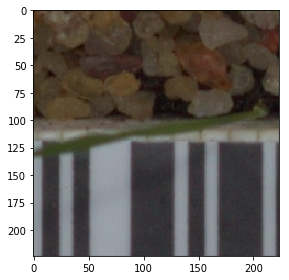

C:\Users\s110024\Documents\CV\HW1\data\train\Black-grass\0050f38b3.png
Black-grass


In [6]:
print(train['data'][0].shape)
io.imshow(train['data'][0])
io.show()
print(train['path'][0])
print(train['species'][0])

## Test Data

In [7]:
test = []
filelist = [file for file in os.listdir(TEST_FOLDER) if file.endswith('.png')]
print('Test -> {}'.format(len(filelist)))
for file in filelist:
    test.append([os.path.join(TEST_FOLDER, file), file, "", []])
test = pd.DataFrame(test, columns=['path', 'file', 'species', 'data'])
print(test.shape)
test.head(2)

Test -> 794
(794, 4)


,path,file,species,data
0,C:\Users\s110024\Documents\CV\HW1\data\test\00...,0021e90e4.png,,[]
1,C:\Users\s110024\Documents\CV\HW1\data\test\00...,003d61042.png,,[]


In [8]:
for i, file in tqdm(enumerate(test['path'])): # 794 in train
    img = io.imread(file)
    img = transform.resize(img, [DATA_SIZE, DATA_SIZE, 3])
    test['data'][i] = img

c:\programdata\miniconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(224, 224, 3)


c:\programdata\miniconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
c:\programdata\miniconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


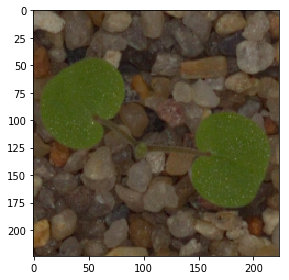

0021e90e4.png


In [9]:
print(test['data'][0].shape)
io.imshow(test['data'][0])
io.show()
print(test['file'][0])

## Using sum of absolute distance

In [10]:
for testID in tqdm(range(len(test))):
    minSAD, answerID = -1, -1
    for trainID in range(len(train)):
        distance = test['data'][testID] - train['data'][trainID]
        SAD = np.sum(np.abs(distance))
        if SAD < minSAD or minSAD == -1:
            minSAD = SAD
            answerID = trainID
    test['species'][testID] = train['species'][answerID]

In [11]:
test[['file', 'species']].to_csv('submission_SAD.csv', index=False)

## Using sum of square distance

In [12]:
for testID in tqdm(range(len(test))):
    minSSD, answerID = -1, -1
    for trainID in range(len(train)):
        distance = test['data'][testID] - train['data'][trainID]
        SSD = np.sum(distance**2)
        if SSD < minSSD or minSSD == -1:
            minSSD = SSD
            answerID = trainID
    test['species'][testID] = train['species'][answerID]

In [13]:
test[['file', 'species']].to_csv('submission_SSD.csv', index=False)